In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('WKNN_preprocessed.csv')
df = pd.DataFrame(df)

In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
num_components = 5
pca = PCA(n_components=num_components)

In [7]:
X_pca = pca.fit_transform(X_scaled)


In [8]:
X_pca = pca.fit_transform(X_scaled)


In [9]:
explained_variance = pca.explained_variance_ratio_

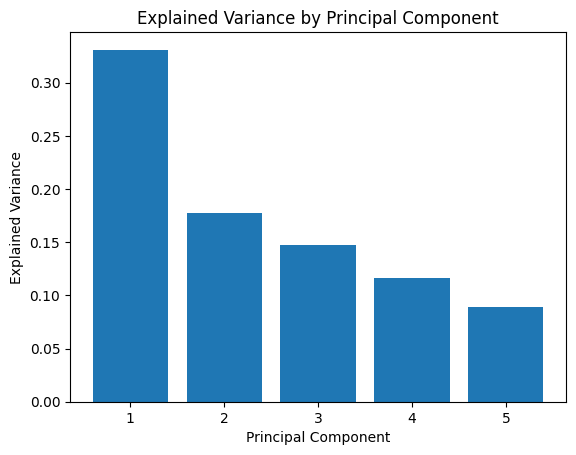

In [10]:
plt.bar(range(1, num_components + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()


In [11]:
selected_features = X_pca[:, :num_components]


In [12]:
selected_features_df = pd.DataFrame(selected_features, columns=[f'PC{i}' for i in range(1, num_components + 1)])
print("Selected Features:")
print(selected_features_df)


Selected Features:
          PC1       PC2       PC3       PC4       PC5
0    1.584653 -0.485881  0.438235  0.448386 -0.510626
1   -1.838188  0.092678 -0.468818 -0.074516 -0.036320
2    0.586631 -0.608538  1.987799  0.465285 -0.571292
3   -2.223738  0.357350 -0.228366 -0.753049  0.167619
4    1.053281  2.814192  1.038552  5.177224 -1.600993
..        ...       ...       ...       ...       ...
763  2.108630 -2.015113 -1.403013 -0.195782 -1.660162
764 -0.372703  0.846708 -0.056393 -0.609845  0.145535
765 -0.932866 -0.786300  0.258040 -0.472442  0.127404
766 -0.422772 -0.028747  0.554327 -0.264922 -0.676547
767 -1.519957  0.706617 -0.740276 -0.401783  0.220191

[768 rows x 5 columns]


In [17]:
selected_features_df['Outcome'] = df['Outcome']

In [14]:
print(selected_features_df)

          PC1       PC2       PC3       PC4       PC5  Outcome
0    1.584653 -0.485881  0.438235  0.448386 -0.510626        1
1   -1.838188  0.092678 -0.468818 -0.074516 -0.036320        0
2    0.586631 -0.608538  1.987799  0.465285 -0.571292        1
3   -2.223738  0.357350 -0.228366 -0.753049  0.167619        0
4    1.053281  2.814192  1.038552  5.177224 -1.600993        1
..        ...       ...       ...       ...       ...      ...
763  2.108630 -2.015113 -1.403013 -0.195782 -1.660162        0
764 -0.372703  0.846708 -0.056393 -0.609845  0.145535        0
765 -0.932866 -0.786300  0.258040 -0.472442  0.127404        0
766 -0.422772 -0.028747  0.554327 -0.264922 -0.676547        1
767 -1.519957  0.706617 -0.740276 -0.401783  0.220191        0

[768 rows x 6 columns]


In [15]:
selected_features_df.to_csv('fuzzy_Selected.csv', index = False)